In [50]:
#learning analytics project
#Based on data from Kuzilek J., Hlosta M., Zdrahal Z. Open University Learning Analytics dataset Sci. Data 4:170171 doi: 10.1038/sdata.2017.171 (2017).
#import relevant libraries
import pandas as pd
import pandas_profiling

##read in the different datasets
assessments=pd.read_csv('/Users/Kirsten/Documents/GitHub/LearningAnalyticsData/anonymisedData/assessments.csv')
courses=pd.read_csv('/Users/Kirsten/Documents/GitHub/LearningAnalyticsData/anonymisedData/courses.csv')
studentAssessment=pd.read_csv('/Users/Kirsten/Documents/GitHub/LearningAnalyticsData/anonymisedData/studentAssessment.csv')
studentInfo=pd.read_csv('/Users/Kirsten/Documents/GitHub/LearningAnalyticsData/anonymisedData/studentInfo.csv')
studentRegistration=pd.read_csv('/Users/Kirsten/Documents/GitHub/LearningAnalyticsData/anonymisedData/studentRegistration.csv')
studentVle=pd.read_csv('/Users/Kirsten/Documents/GitHub/LearningAnalyticsData/anonymisedData/studentVle.csv')
vle=pd.read_csv('/Users/Kirsten/Documents/GitHub/LearningAnalyticsData/anonymisedData/vle.csv')

In [62]:
###initial data exploration
#pandas_profiling.ProfileReport(studentAssessment)

In [51]:
###create a dictionary that contains overall user engagement (sum of all clicks) per student per course_
studentlist=studentVle.id_student.unique()
user_engagement={}
for currentstudent in studentlist:
    user_engagement[currentstudent]=studentVle.loc[studentVle['id_student']==currentstudent,'sum_click'].sum()

In [52]:
##add the neew variable to the user engagement data frame by first changing dictionrary to dataframe adn then marging the 2 frames
pd_user_engagement=pd.DataFrame(list(user_engagement.items()),columns = ['id_student','clicks'])
result = pd.merge(studentAssessment, pd_user_engagement, how='outer', on=['id_student', 'id_student'])

In [53]:
##save or load the result
#result.to_csv('studentAssessmentWithEnagement',index=False)
result= pd.read_csv('/Users/Kirsten/Documents/GitHub/LearningAnalyticsData/studentAssessmentWithEnagement')


In [55]:
%matplotlib inline
newresult=result.dropna()
#simple linear regression fit
#sns.lmplot(x="clicks", y="score", data=newresult, x_estimator=np.mean,line_kws={"color": "darkblue"});

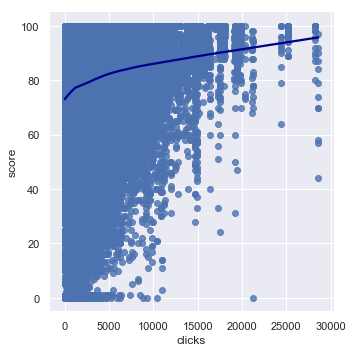

In [27]:
#nonparametric regression
sns.lmplot(x="clicks", y="score", data=newresult,
           lowess=True, line_kws={"color": "darkblue"});


In [57]:
##raincloud plots Allen M, Poggiali D, Whitaker K et al. Raincloud plots: a multi-platform tool for robust data visualization [version 1; peer review: 2 approved]. Wellcome Open Res 2019, 4:63. DOI: 10.12688/wellcomeopenres.15191.1
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
#sns.set(style="darkgrid")
#sns.set(style="whitegrid")
#sns.set_style("white")
sns.set(style="whitegrid",font_scale=2)
import matplotlib.collections as clt

#import sys
#!{sys.executable} -m pip install ptitprince
import ptitprince as pt
%matplotlib inline
newresult=result.dropna()

courseAAA13=newresult.drop(newresult[~newresult.id_assessment.isin([1752,1753,1754,1755,1756,1757])].index)
courseAAA14=newresult.drop(newresult[~newresult.id_assessment.isin([1758,1759,1760,1761,1762,1763])].index)
#courseBBB13bCMA=newresult.drop(newresult[~newresult.id_assessment.isin([14991,14992,14993,14994,14995,14996])].index)
#courseBBB13bTMA=newresult.drop(newresult[~newresult.id_assessment.isin([14984,14985,14986,14987,14988,14989])].index)
#courseBBB13jCMA=newresult.drop(newresult[~newresult.id_assessment.isin([15003,15004,15005,15006,15007,15008])].index)
#courseBBB13jTMA=newresult.drop(newresult[~newresult.id_assessment.isin([14996,14997,14998,14999,15000,15001])].index)
#courseBBB14bCMA=newresult.drop(newresult[~newresult.id_assessment.isin([1752,1753,1754,1755,1756,1757])].index)
#courseBBB14bTMA=newresult.drop(newresult[~newresult.id_assessment.isin([1752,1753,1754,1755,1756,1757])].index)
#courseBBB14jCMA=newresult.drop(newresult[~newresult.id_assessment.isin([1752,1753,1754,1755,1756,1757])].index)
#courseBBB14jTMA=newresult.drop(newresult[~newresult.id_assessment.isin([1752,1753,1754,1755,1756,1757])].index)


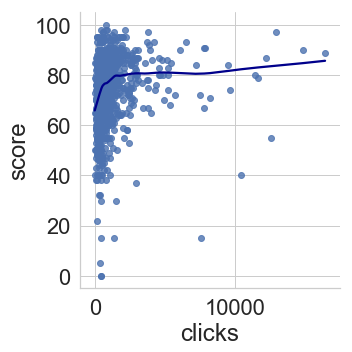

In [59]:
courseBBB13jCMAend=newresult.drop(newresult[~newresult.id_assessment.isin([15008])].index)

#nonparametric regression of clicks of end assement to score
sns.lmplot(x="clicks", y="score", data=courseBBB13jTMAend,
           lowess=True, line_kws={"color": "darkblue"});

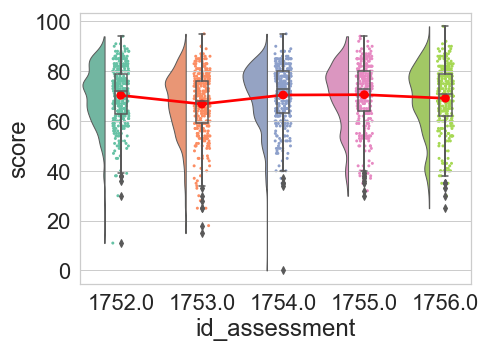

In [61]:
#adding a red line connecting the groups' mean value (useful for longitudinal data)
dx="id_assessment"; dy="score"; ort="v"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(7, 5))

ax=pt.RainCloud(x = dx, y = dy, data = courseAAA13, palette = pal, bw = sigma,
                 width_viol = .6, ax = ax, orient = ort,
               pointplot = True)

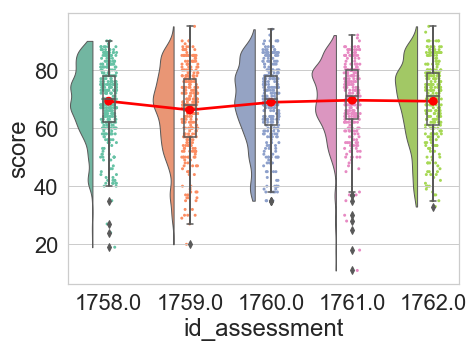

In [24]:
f, ax = plt.subplots(figsize=(7, 5))

ax=pt.RainCloud(x = dx, y = dy, data = courseAAA14, palette = pal, bw = sigma,
                 width_viol = .6, ax = ax, orient = ort,
               pointplot = True)

In [8]:
assessment1752=newresult[newresult.id_assessment==1752.0]
assessment1753=newresult[newresult.id_assessment==1753.0]
assessment1754=newresult[newresult.id_assessment==1754.0]
assessment1755=newresult[newresult.id_assessment==1755.0]
assessment1756=newresult[newresult.id_assessment==1756.0]

assessment1752.rename(columns={"score": "1752score"}, inplace=True)
merged_assessment =pd.merge(assessment1752, assessment1753[['id_student','score']], on='id_student')
merged_assessment.rename(columns={"score": "1753score"}, inplace=True)
merged_assessment =pd.merge(merged_assessment, assessment1754[['id_student','score']], on='id_student')
merged_assessment.rename(columns={"score": "1754score"}, inplace=True)
merged_assessment =pd.merge(merged_assessment, assessment1755[['id_student','score']], on='id_student')
merged_assessment.rename(columns={"score": "1755score"}, inplace=True)
merged_assessment =pd.merge(merged_assessment, assessment1756[['id_student','score']], on='id_student')
merged_assessment.rename(columns={"score": "1756score"}, inplace=True)

/Users/Kirsten/anaconda3/envs/nlp_course/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [9]:
      ###visualisation est case for only two of the assessement
scores_only=merged_assessment[['1752score','1753score','1754score','1755score','1756score']]
#Set the amount of jitter and create a dataframe containing the jittered x-axis values
jitter_2 = 0.05
np.random.seed(3)
df_jitter_2 = pd.DataFrame(np.random.normal(loc=0, scale=jitter_2, size=scores_only.values.shape), columns=scores_only.columns)
#Update the dataframe with adding a number based on the length on the columns. Otherwise all datapoints would be at the same x-axis location.
df_jitter_2 += np.arange(len(scores_only.columns))


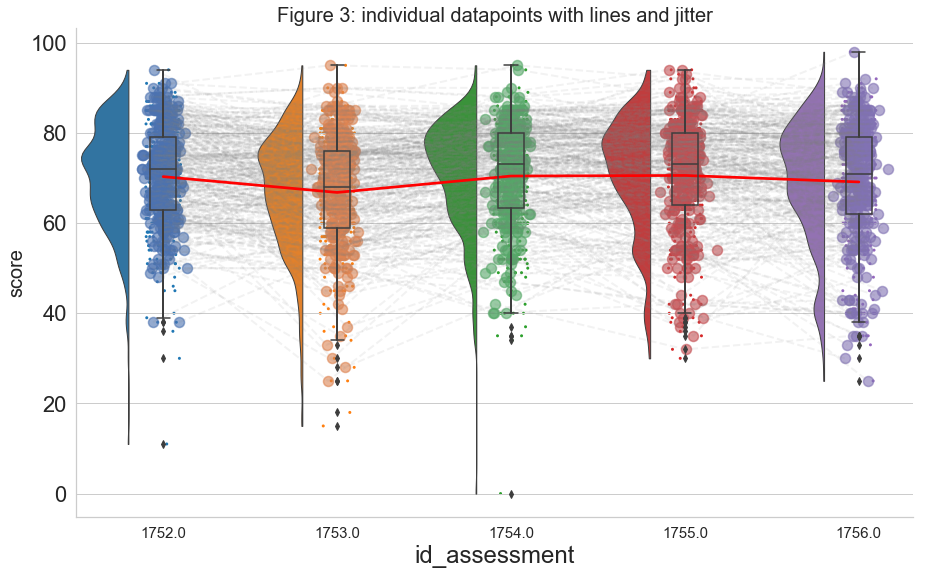

In [31]:
#J. van Langen. (2020). Open-visualizations in R and Python. Zenodo. 
#http://doi.org/10.5281/zenodo.3715576
#Visualisation connecting individual students data points on two different tests
# Define pre-settings
w = 6
h = 6
title_size = 20
xlab_size = 15
ylab_size = 20
fig, ax = plt.subplots(figsize=(15,9))
labels = ['1752score', '1753score','1754score','1755score','1756score']
for col in scores_only:
    
    ax.plot(df_jitter_2[col], scores_only[col], 'o', alpha=.6, zorder=2, ms=10, mew=1.5)

for idx in scores_only.index:
    ax.plot(df_jitter_2.loc[idx,['1752score','1753score','1754score','1755score','1756score']], scores_only.loc[idx,['1752score','1753score','1754score','1755score','1756score']], color = 'gray', linewidth = 2, linestyle = '--',alpha = .1)    
    #Additonal settings
    ax.set_xticks(range(len(scores_only.columns)))
    ax.set_xticklabels((labels), size= xlab_size)
    ax.set_xlim(-1, len(scores_only.columns))
    ax.set_ylabel('Value', size = ylab_size)
    ax.set_title('Figure 3: individual datapoints with lines and jitter', size = title_size)
    sns.despine()
    

##adding a red line connecting the groups' mean value (useful for longitudinal data)
dx="id_assessment"; dy="score"; ort="v"; pal = "tab10"; sigma = .2
#f, ax = plt.subplots(figsize=(7, 5))

ax=pt.RainCloud(x = dx, y = dy, data = newresult, bw = sigma, palette = pal,
    width_viol = .6, ax = ax, orient = ort,
    pointplot = True)   


    

In [68]:
###also add student info to the result dataframe
assessment_clicks=pd.merge(result,assessments,how='outer',on=['id_assessment'])
###also add student info to the result dataframe
assessment_clicks_studentinfo=pd.merge(assessment_clicks,studentInfo,how='outer',on=['id_student','code_presentation'])

In [86]:
assessment_clicks_studentinfo.gender[assessment_clicks_studentinfo.gender=='M']=0
assessment_clicks_studentinfo.gender[assessment_clicks_studentinfo.gender=='F']=1
assessment_clicks_studentinfo.highest_education[assessment_clicks_studentinfo.highest_education=='Lower Than A Level']=0
assessment_clicks_studentinfo.highest_education[assessment_clicks_studentinfo.highest_education=='A Level or Equivalent']=1
assessment_clicks_studentinfo.highest_education[assessment_clicks_studentinfo.highest_education=='HE Qualification']=2
assessment_clicks_studentinfo.highest_education[assessment_clicks_studentinfo.highest_education=='Post Graduate Qualification']=3
assessment_clicks_studentinfo.age_band[assessment_clicks_studentinfo.age_band=='0-35']=0
assessment_clicks_studentinfo.age_band[assessment_clicks_studentinfo.age_band=='35-55']=1
assessment_clicks_studentinfo.age_band[assessment_clicks_studentinfo.age_band=='55<=']=2
#future use LabelEncoder() instead

/Users/Kirsten/anaconda3/envs/nlp_course/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Kirsten/anaconda3/envs/nlp_course/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Kirsten/anaconda3/envs/nlp_course/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from

In [97]:
%matplotlib inline
assessment_clicks_studentinfo.dropna()
courseAAAend=assessment_clicks_studentinfo.drop(assessment_clicks_studentinfo[~assessment_clicks_studentinfo.id_assessment.isin([1756,1762])].index)


In [98]:
pandas_profiling.ProfileReport(courseAAAend)

Number of variables,22
Number of observations,576
Total Missing (%),0.2%
Total size in memory,99.1 KiB
Average record size in memory,176.1 B
Numeric,8
Categorical,5
Boolean,4
Date,0
Text (Unique),0
Rejected,5


In [100]:
##define X and Y
X = courseAAAend[['clicks','gender','highest_education','age_band','num_of_prev_attempts']]
y = courseAAAend['score']
###create training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.30)

In [108]:
###create model Linear Regression
from sklearn import linear_model
reg = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
predictions = regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, predictions))

Coefficients: 
 [ 0.00177555 -0.          0.66794788  0.         -0.        ]
Mean squared error: 182.50


In [101]:
###create model ElasticNet
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
print(regr.intercept_)
print(regr.coef_)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)